# **Entendiendo el conjunto de datos**

In [52]:
import pandas as pd

In [ ]:
datos = pd.read_csv('../data/flights.csv')
datos.shape

(71175, 11)

In [54]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


Nuestro conjunto de datos cuenta con 71,175 filas y 11 columnas. Para examinar más de cerca, utilizaremos el método head para visualizar las primeras cinco filas del dataframe.

Las columnas incluyen la identificación del vuelo (flight ID), la aerolínea (airline), el tipo de aeronave (aircraft), si pertenece al espacio Schengen o no, el origen (origin), el horario de llegada (arrival time), el horario de salida (departure time), el día del año (day), si es feriado (is holiday), y nuestra variable respuesta que es el retraso (delay).

Esta variable está en minutos y segundos. Por ejemplo, el vuelo 26 de la aerolínea MM tuvo un retraso de 70 minutos y aproximadamente 12 segundos. Sabemos que son 12 segundos porque multiplicamos el valor decimal por 60. Utilizaremos el método round para mostrar que son aproximadamente 12 segundos.

In [55]:
round(.88*60)

53

In [56]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Esto nos indica que tenemos un total de 11 columnas y 71,175 registros, desde el 0 al 71,174. Cada columna tiene un número consecutivo, comenzando con Flight ID y terminando con Delay.

Todos los registros son no nulos, lo que significa que ya tienen un valor asignado, por lo que no necesitamos preocuparnos por tratar valores nulos en este momento. En cuanto al tipo de datos, observamos que los enteros (int64) incluyen la identificación del vuelo, el día del año y el año.

In [57]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


El conteo de valores para todos es 71,175. El promedio de retraso, es decir, si sacamos el promedio de retraso de todos los vuelos, sumando todos los minutos y dividiéndolos entre el total de observaciones, es de 12 minutos y alrededor de 30 segundos.

El desvío estándar, o sea, la variación que puede tener desde ese promedio, es de 23 minutos, lo cual es un desvío bastante grande, un margen muy amplio con respecto a ese promedio. Tenemos el valor mínimo de retraso y un valor máximo de retraso.

¿Qué quiere decir este menos 41? Quiere decir que estos vuelos, o este vuelo, esta observación que es el valor mínimo, no se retrasó sino que, por el contrario, salió 41 minutos adelantado. El valor mínimo indica que hay un vuelo dentro de los 71 mil registros que salió 41 minutos adelantado.

Si tomamos nuestro conjunto de datos y ordenamos de menor a mayor todos los valores de retraso, hasta el 25% de los vuelos salieron con algún adelanto. Observamos que el primer cuantil, que es este 25%, dice menos 4.41, lo que equivale a alrededor de 4 minutos y 25 segundos. Esto significa que hasta el 25% de los vuelos han salido no solo dentro del tiempo, sino incluso más rápido de lo esperado.

Si continuamos viendo la secuencia hasta el 50% de los datos, que sería la mediana o el segundo cuantil, ya observamos un atraso de alrededor de 9 minutos y 45 segundos.

Al avanzar un poco más, hasta el 75% de los datos, ya hay un atraso de 27 minutos y alrededor de 40 segundos. Comenzamos a observar que se presenta un atraso considerable, lo cual genera pérdidas y situaciones incómodas tanto para los pasajeros como para la aerolínea y el aeropuerto. El valor máximo de atraso es de hasta 125 minutos, es decir, más de dos horas de atraso.

In [58]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


También podemos ver no solo las variables numéricas, sino las variables categóricas. Añadimos en nuestra descripción `include='O'`, lo que nos dará también la estadística descriptiva de las variables categóricas. De las aerolíneas, tenemos tres, y la que más se muestra es la aerolínea BZ con 47,598 ocurrencias de aeronaves.

Tenemos seis tipos distintos de aeronave, siendo el Airbus A320 el más frecuente en nuestros registros, con más de 30,700 registros. En cuanto al espacio Schengen, hay dos posibles clases: Schengen y no Schengen, siendo Schengen la más frecuente, con más de 42,000 ocurrencias.

Por último, la variable de origen, que sería el aeropuerto de origen, tiene 10 aeropuertos desde donde llegan vuelos al aeropuerto que analizamos, siendo el aeropuerto con la sigla TZF el que más vuelos recibe, con 14,162 ocurrencias.

> *El método describe es una herramienta poderosa que proporciona estadísticas descriptivas de un conjunto de datos. Este método calcula varias estadísticas resumidas a la vez, incluyendo el conteo (número de elementos), media, desviación estándar (medida de dispersión de los datos), mínimo (el valor más bajo), los cuartiles (25%, 50% y 75% - correspondientes al primer cuartil, mediana y tercer cuartil, respectivamente) y el máximo (el valor más alto). Además, es posible obtener las estadísticas descriptivas para las variables categóricas: df.describe(include=['O']).*

# **Análisis gráfico del conjunto de datos**

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

Queremos analizar los atrasos de vuelos con respecto a las aerolíneas y también el número de vuelos por cada aerolínea o compañía aérea. Para ello, observaremos el promedio de retraso.

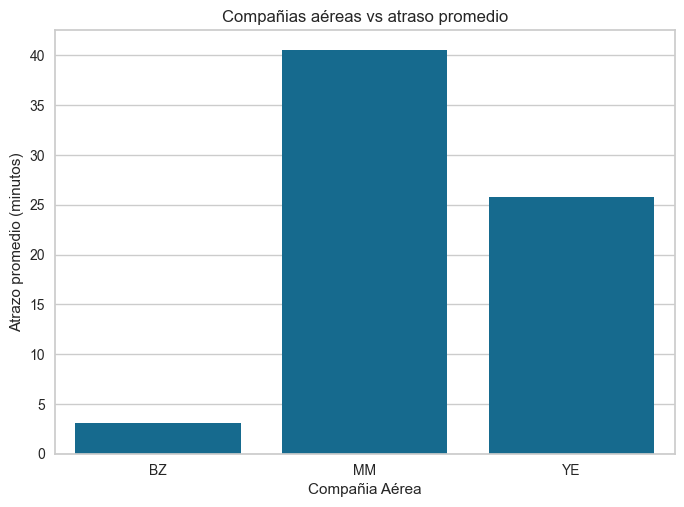

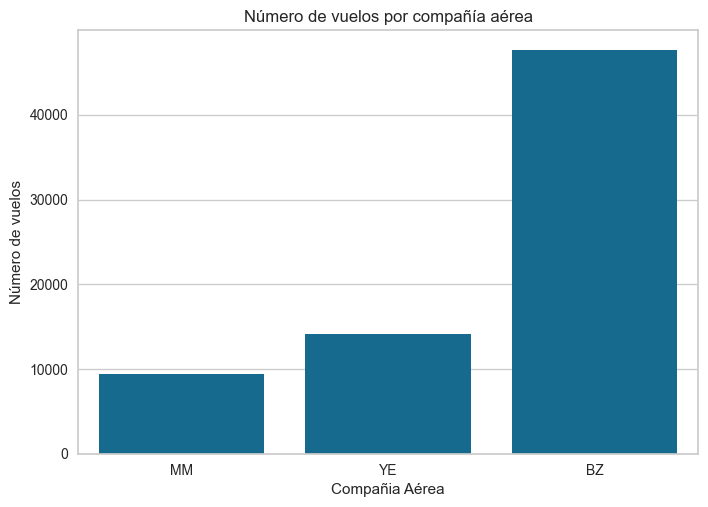

In [60]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañias aéreas vs atraso promedio')
plt.xlabel('Compañia Aérea')
plt.ylabel('Atrazo promedio (minutos)')
plt.show()

sns.countplot(data=datos, x='airline', )
plt.title('Número de vuelos por compañía aérea')
plt.xlabel('Compañia Aérea')
plt.ylabel('Número de vuelos')
plt.show()

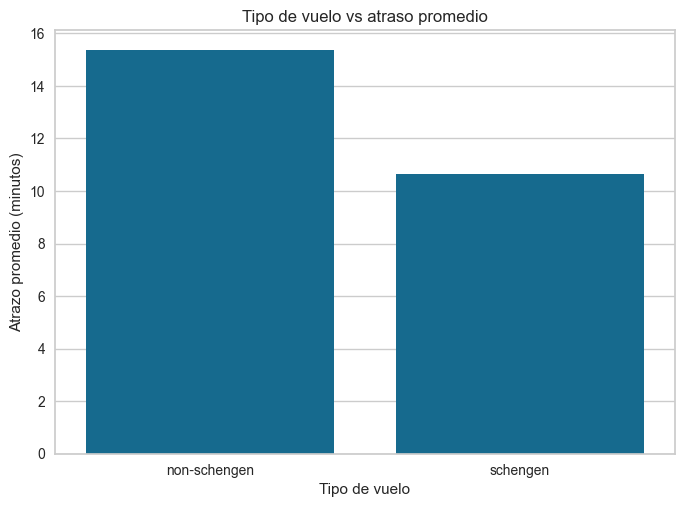

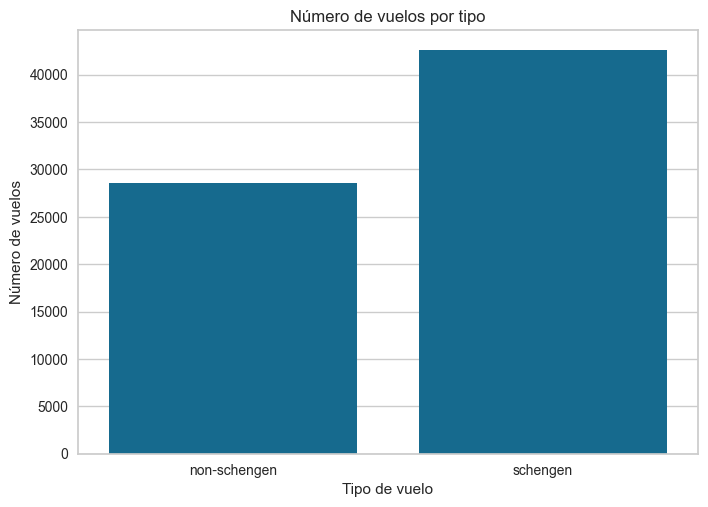

In [61]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atrazo promedio (minutos)')
plt.show()

sns.countplot(data=datos, x='schengen', )
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

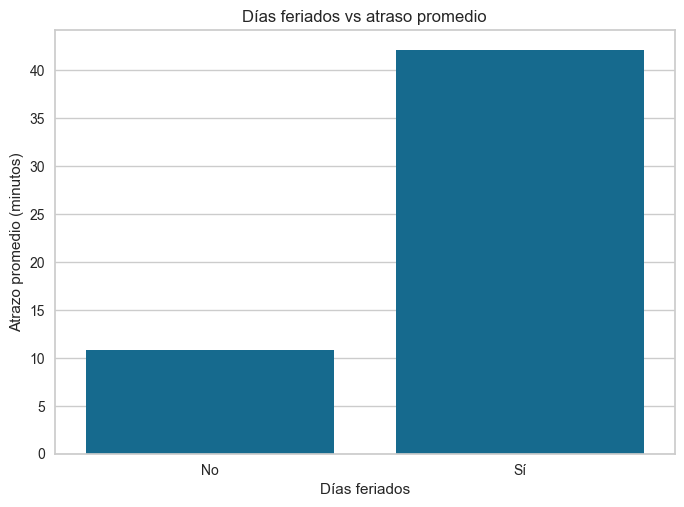

In [62]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.xticks([0, 1], ['No', 'Sí'])
plt.ylabel('Atrazo promedio (minutos)')
plt.show()

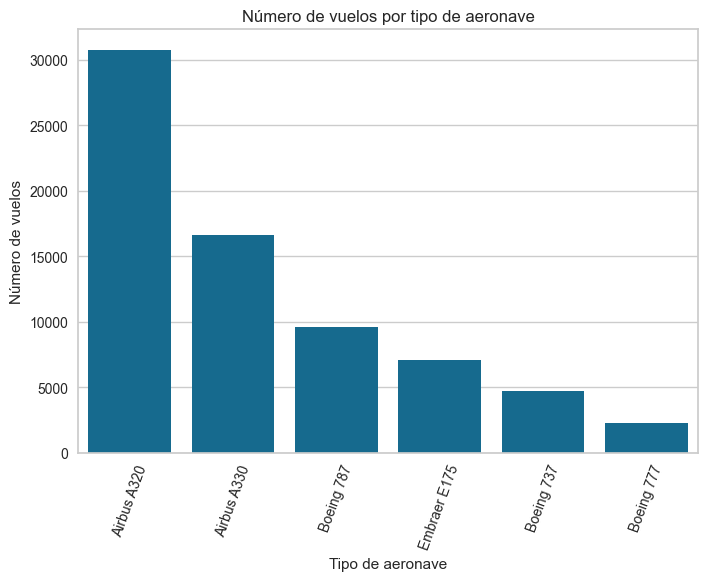

In [63]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data=datos, x='aircraft_type', order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

# **Analizando la distribución de los datos**

Ya hemos generado algunas visualizaciones exploratorias de nuestros datos. Sin embargo, es muy importante que entendamos cómo están distribuidos.

Para ello, nos apoyaremos en un instrumento llamado histograma, que nos permite analizar la frecuencia de nuestros diferentes valores. Nos concentraremos en los que más nos interesan, como el horario de llegada de los vuelos, el horario de salida y, principalmente, el atraso en minutos.

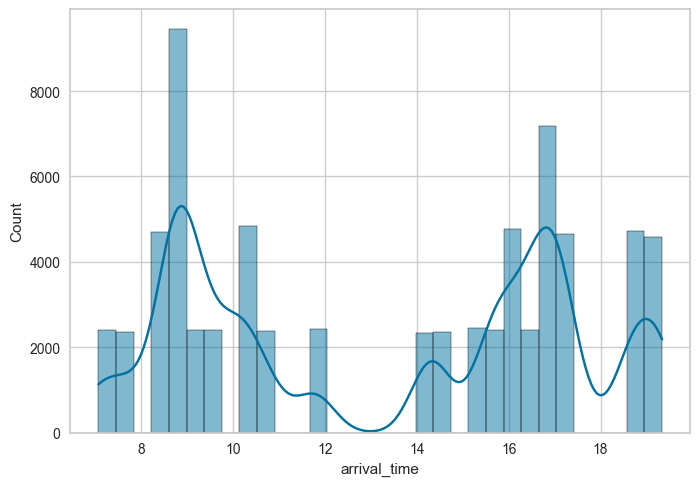

In [64]:
sns.histplot(data=datos, x='arrival_time', kde=True);

Así, podremos observar cómo está distribuido nuestro horario de llegada. Notamos aquí una curva de densidad interesante, pero surge la pregunta de si el ancho de los bins que estamos utilizando es el más adecuado. Es difícil determinarlo a simple vista sin un análisis matemático que nos permita establecerlo.

Podríamos apoyarnos en la regla de [Friedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule), que nos ayuda a establecer que el ancho de los bins es igual a dos veces el rango intercuartil dividido entre la raíz cúbica de la cantidad de observaciones.

In [65]:
import numpy as np

def ancho_bin(df, columna):
    q75, q25 = np.percentile(df[columna], [75, 25])
    iqr = q75 - q25
    ancho = 2 * iqr * np.power(len(df[columna]), -1/3)
    return ancho

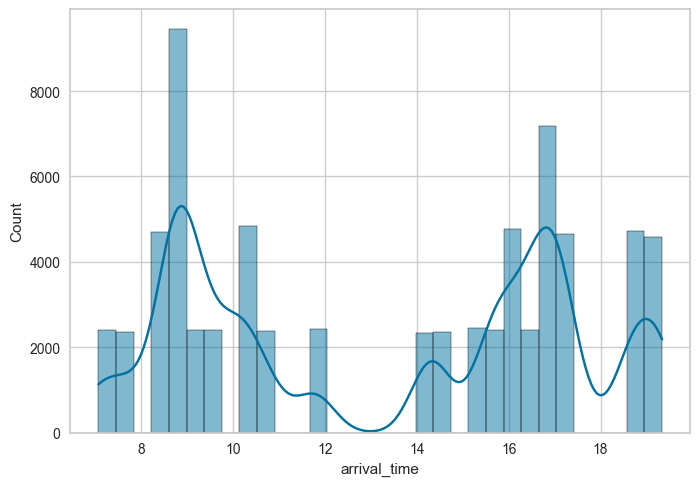

In [66]:
binwhidth = ancho_bin(datos, 'arrival_time')

sns.histplot(data=datos, x='arrival_time', binwidth=binwhidth, kde=True);

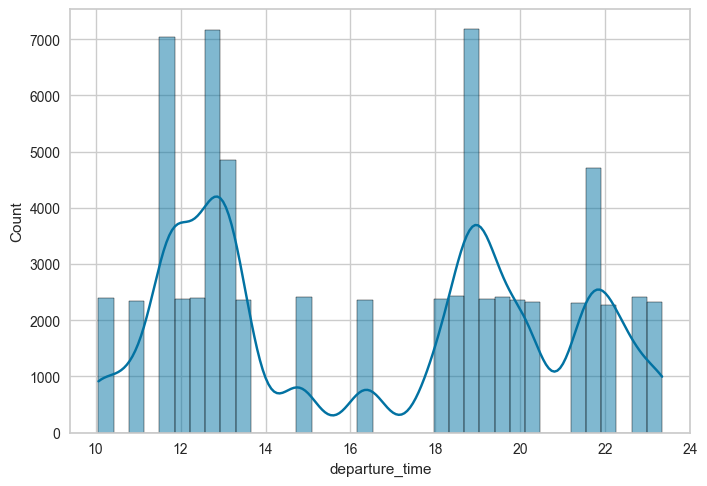

In [67]:
binwhidth = ancho_bin(datos, 'departure_time')

sns.histplot(data=datos, x='departure_time', binwidth=binwhidth, kde=True);

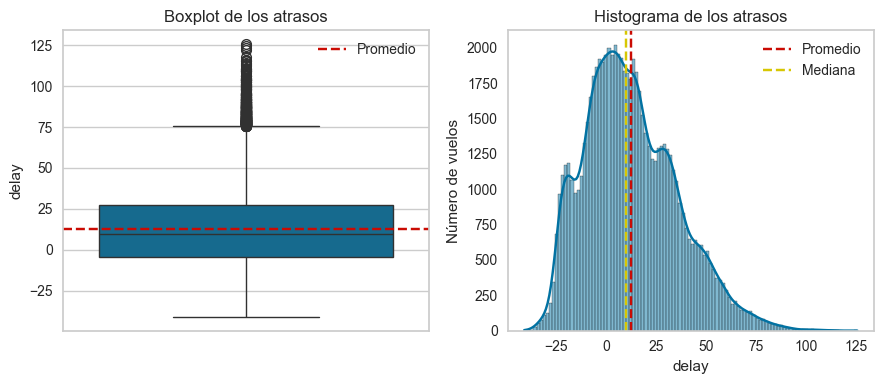

In [68]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

# Visualización de la distribución de los atrasos
fig, ax = plt.subplots(1, 2, figsize=(9, 4))

# Boxplot de los atrasos
sns.boxplot(data=datos, y='delay', ax=ax[0])
ax[0].set_title('Boxplot de los atrasos')
ax[0].axhline(atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[0].legend()

binwhidth = ancho_bin(datos, 'delay')

# Histograma de los atrasos
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwhidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma de los atrasos')
ax[1].axvline(atraso_promedio, color='r', linestyle='--', label='Promedio')
ax[1].axvline(atraso_mediana, color='y', linestyle='--', label='Mediana')
ax[1].legend()

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.show()

En el boxplot, observamos que la mediana está alrededor de 10 minutos y el promedio alrededor de 12 minutos. Recordando nuestro método describe en pandas, la mediana era de aproximadamente 9 minutos y 45 segundos, y el promedio de 12 minutos y 30 segundos.

El valor mínimo era de 41 minutos de adelanto del vuelo y el máximo de 125 minutos. Estos 125 minutos son considerados outliers o observaciones atípicas. El valor máximo que realmente consideramos en el boxplot es de alrededor de 75 minutos de atraso, y el mínimo de 44 minutos, que fue el adelanto del vuelo.

La distribución en el histograma muestra que el promedio y la mediana están muy cercanos, lo que indica una distribución cercana a la normal. Con este conjunto de datos, en nuestra próxima clase, procederemos a generar nuevos atributos para crear nuestro modelo predictivo de atrasos. Nos vemos en la próxima clase.

# **Creando nuevas columnas**

Ahora procederemos a generar nuevas features o nuevos atributos, lo que se conoce como **feature engineering** (*ingeniería de atributos*).

In [69]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

Lo que haremos es crear en nuestro DataFrame una columna que llamaremos `date`. Tomaremos el año y lo convertiremos en string con `astype(str)`, y lo concatenaremos con un guion y también con el día.

Sin embargo, como comienza en el día cero, no podemos tratar este valor así; debemos comenzar a partir del día uno para poder utilizar un método de la biblioteca datetime que nos permita generar una fecha a partir de este formato.

In [70]:
datos['date'] = datos['year'].astype(str) + '-' + (datos['day']+1).astype(str)

datos['date'] = pd.to_datetime(datos['date'], format='%Y-%j')

datos.tail(2)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


generemos una columna que nos permita determinar si es fin de semana o no. Es muy interesante; tomaremos nuestro DataFrame y crearemos una columna que llamaremos `isWeekend`. Ya tenemos `isHoliday`, ahora añadiremos `isWeekend`.

La columna isWeekend será igual a datos. De datos, tomaremos la columna date y, utilizando el método de `datetime`, aplicaremos weekday y isin. Esto verificará si el día de la semana está dentro del sexto y séptimo día.

Los días comienzan a partir de cero, por lo que el día cinco representa sábado y el seis representa domingo; el lunes sería el cero. Así, sabemos que estamos aislando sábado y domingo para identificar si es fin de semana.

Además, crearemos una variable llamada dayName en datos. Con el mismo método de datetime, utilizaremos day_name, que nos devuelve el nombre del día de la semana. Vamos a realizar un datos.head o datos.sample para tomar una muestra de cinco registros de nuestro conjunto de datos.

In [71]:
datos['is_weekend'] = datos['date'].dt.weekday.isin([5, 6])

datos['day_name'] = datos['date'].dt.day_name()

datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
4816,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,321,2010,False,4.057410,2010-11-18,False,Thursday
15622,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,311,2012,False,-39.074558,2012-11-07,False,Wednesday
45429,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,108,2018,False,-5.560326,2018-04-19,False,Thursday
57501,24,BZ,Airbus A320,schengen,FJB,9.668655,12.668655,183,2020,False,1.413336,2020-07-02,False,Thursday
18938,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,167,2013,False,28.115874,2013-06-17,False,Monday


Observamos que ya tenemos isWeekend, que quedará como booleano. Si es fin de semana, será verdadero para el día que fue sábado; perfecto, los otros días no son fin de semana. Los días son viernes (Friday), martes (Tuesday), miércoles (Wednesday), y la fecha está tal como la especificamos.

Hemos añadido nuevos atributos a partir únicamente del día y el año. Sin embargo, aún tenemos muchas variables categóricas, y para poder modelar con machine learning, es necesario que las codifiquemos.

# **Feature encoding**

Los modelos de Machine Learning funcionan mejor cuando tenemos los datos codificados, es decir, variables numéricas. Sin embargo, en muchos casos nuestras variables no son numéricas, sino de otro tipo, como cadenas de caracteres o booleanas. Para abordar esto, vamos a utilizar nuevamente la información de nuestros metadatos para identificar qué tipo de columnas tenemos.

In [72]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   flight_id       71175 non-null  int64         
 1   airline         71175 non-null  object        
 2   aircraft_type   71175 non-null  object        
 3   schengen        71175 non-null  object        
 4   origin          71175 non-null  object        
 5   arrival_time    71175 non-null  float64       
 6   departure_time  71175 non-null  float64       
 7   day             71175 non-null  int64         
 8   year            71175 non-null  int64         
 9   is_holiday      71175 non-null  bool          
 10  delay           71175 non-null  float64       
 11  date            71175 non-null  datetime64[ns]
 12  is_weekend      71175 non-null  bool          
 13  day_name        71175 non-null  object        
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), o

Si no deseamos ver estas advertencias, podemos importar la biblioteca warnings y utilizar warnings.filterwarnings con la opción "ignore". Esto ignorará las advertencias.

In [73]:
import warnings
warnings.filterwarnings('ignore')

Primero, trabajaremos con las que tienen dos categorías. Para los datos de "Schengen", tomaremos nuestra columna y utilizaremos el método replace. Usaremos un diccionario donde la primera llave será "non Schengen" (cuando no sea espacio Schengen) y le asignaremos el valor 0. Cuando sea "Schengen", le asignaremos el valor 1.

Para las otras dos variables booleanas, simplemente copiaremos estos valores. Tomaremos IsHoliday, lo copiaremos y lo pegaremos en lugar de "non Schengen". Así, el valor False será reemplazado por 0 y True por 1. Aplicaremos el mismo diccionario para IsWeekend.

In [74]:
datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen': 1})
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True: 1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True: 1})
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
20390,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,264,2013,0,-13.271763,2013-09-22,1,Sunday
45191,8,BZ,Airbus A320,1,ZQO,15.729617,18.729617,92,2018,0,-4.473155,2018-04-03,0,Tuesday
42175,21,BZ,Boeing 737,1,FJB,7.065594,10.065594,256,2017,0,4.356725,2017-09-14,0,Thursday
5139,16,MM,Airbus A320,0,CSF,17.041281,20.041281,342,2010,0,69.553577,2010-12-09,0,Thursday
47428,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,241,2018,0,-24.292978,2018-08-30,0,Thursday


In [75]:
categorias = ['airline', 'aircraft_type', 'origin', 'day_name']

pd.get_dummies(datos, columns=categorias, dtype='int').head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


Aún tenemos variables de tipo objeto como "Airline", "Aircraft", "Origin" y "DayName", que acabamos de crear. Vamos a crear una lista llamada categóricas y colocaremos estas variables: "Airline", "Aircraft Type", "Origin" (aeropuerto de origen) y "DayName".

Utilizaremos un método de pandas que nos permite codificar nuestras variables con ceros y unos de forma numérica: get_dummies. Usaremos pd.get_dummies y especificaremos nuestro conjunto de datos, las columnas que queremos codificar (columns=categóricas) y el tipo de dato (dtype) que será entero. Ejecutaremos esto sin almacenarlo para observar qué sucede.

El método toma las columnas y, por ejemplo, si el día es viernes, asigna 1 a ese registro y 0 al resto de los días de la semana. Generamos muchos atributos, pero no hay inconveniente, ya que el objetivo es codificar nuestras variables.

In [76]:
datos_codificados = pd.get_dummies(datos, columns=categorias, dtype='int')

datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
53454,13,0,10.172731,13.172731,278,2019,0,-25.486307,2019-10-06,1,...,1,0,0,0,0,0,1,0,0,0
53195,26,0,8.885071,10.885071,261,2019,0,29.145867,2019-09-19,0,...,1,0,0,0,0,0,0,1,0,0
13599,10,0,8.939996,11.939996,176,2012,0,48.061884,2012-06-25,0,...,1,0,0,0,1,0,0,0,0,0
34760,2,1,19.196804,22.196804,127,2016,0,-3.908933,2016-05-07,1,...,0,0,1,0,0,1,0,0,0,0
46988,24,1,9.668655,12.668655,212,2018,0,4.708926,2018-08-01,0,...,0,0,0,0,0,0,0,0,0,1


# **Limpiando los datos**

Ya tenemos un DataFrame codificado, con todas nuestras variables casi listas para introducirlas al modelo de Machine Learning (aprendizaje automático).

Sin embargo, es necesario que analicemos un poco mejor las variables que estamos utilizando, porque hay casos en los cuales las variables pueden tener comportamientos muy semejantes y pueden acabar perjudicando nuestro modelado.

¿A qué nos referimos con ello? Notamos que tanto el horario de llegada como el horario de salida tenían un comportamiento muy semejante. Si observamos la gráfica en la parte superior, cuando estábamos viendo la distribución de estos horarios, por ejemplo, el horario de llegada presentaba una distribución bimodal, y el horario de salida, DepartureTime, de la misma forma. Entonces, se parecen mucho, pero matemáticamente, ¿cómo podemos validar lo que estamos diciendo?

Podemos utilizar un método de pandas, que es el método de las correlaciones. Vamos a tomar nuestras variables ArrivalTime y DepartureTime. Básicamente, un mapa de correlación nos dice cómo se relaciona una variable, o un número definido de variables, con respecto a otras.

La correlación puede ser positiva o negativa, y varía de menos uno a uno. De cero a menos uno tenemos las correlaciones negativas. ¿Qué quiere decir esto? Que la variación es inversamente proporcional. En otras palabras, mientras una variable crece, la otra decrece en la misma proporción.

Un ejemplo muy sencillo: mientras más se demora un vuelo en salir, menos satisfacción tienen los clientes. Entonces, hay una correlación negativa.

Ahora bien, si tomamos una correlación positiva, sería de cero a uno. Aplicándolo a nuestro caso, mientras menos tiempo se demora la aerolínea en preparar sus aeronaves, menos será la demora. Entonces, ambas variables se comportan de manera similar, creciendo o decreciendo juntas. Esa es la idea detrás de la correlación.

In [77]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


Vamos a ver la correlación entre el horario de llegada y el horario de salida. Observamos que existe una correlación de casi 100%.

La correlación es muy fuerte. El hecho de incluir estas dos variables puede sesgar nuestro modelo. Debemos escoger solo una de ellas. Además, generamos nuevas variables.

In [78]:
datos_codificados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   flight_id                   71175 non-null  int64         
 1   schengen                    71175 non-null  int64         
 2   arrival_time                71175 non-null  float64       
 3   departure_time              71175 non-null  float64       
 4   day                         71175 non-null  int64         
 5   year                        71175 non-null  int64         
 6   is_holiday                  71175 non-null  int64         
 7   delay                       71175 non-null  float64       
 8   date                        71175 non-null  datetime64[ns]
 9   is_weekend                  71175 non-null  int64         
 10  airline_BZ                  71175 non-null  int64         
 11  airline_MM                  71175 non-null  int64     

Considerando esto, vamos a proceder de la siguiente manera. Crearemos una variable que llamaremos df. Tomaremos los datos codificados y realizaremos un drop, especificando entre paréntesis las columnas que vamos a eliminar. Entonces, escribimos columns= y colocamos en una lista las columnas a eliminar.

La primera columna será flightID. Eliminaremos DepartureTime, ya que tanto el horario de llegada como el de salida tienen una correlación muy alta. Escogemos una de ellas, el horario de salida, DepartureTime. También eliminaremos día, año y fecha (date). ¿Por qué las eliminamos? Porque no estamos realizando un análisis temporal con series temporales. Simplemente estamos previendo atrasos considerando las demás variables.

In [79]:
df = datos_codificados.drop(columns=['flight_id', 'departure_time', 'day', 'year', 'date'])

df.sample(5)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
49544,0,15.967963,0,-10.109400,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1953,0,19.341235,0,0.461133,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11798,1,11.781391,0,8.083627,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
39690,1,9.344097,1,52.955464,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
50192,1,8.564949,0,13.713580,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


# **Definiendo una baseline**

Vamos a iniciar con nuestro DataFrame completamente tratado para el modelado con Machine Learning (aprendizaje automático). Para ello, debemos establecer en primer lugar una línea base o referencia, conocida como Baseline. Esta Baseline será nuestro punto de partida y compararemos todo nuestro modelado con ella, ya que la idea es mejorarla.

Nos apoyaremos en gran medida en la biblioteca Scikit-Learn. Esta biblioteca es muy útil para trabajar con Machine Learning. Estamos trabajando con regresión, y existen diversos tipos de modelos de regresión que podemos utilizar, así como clasificación, clustering (agrupamiento) y selección de modelos.

In [80]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# Definiendo las variables predictoras y la variable objetivo
X = df.drop(['delay'], axis=1)
y = df['delay']

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definiendo una baseline
baseline = DummyRegressor()
# Ajustando el modelo a los datos de entrenamiento
baseline.fit(X_train, y_train)

DummyRegressor()

Importaremos de sklearn.metrics las métricas mean_squared_error, mean_absolute_error y r2_score. Estas métricas nos permitirán medir el error de nuestro modelo. El coeficiente de determinación (r2_score) es especialmente importante, ya que indica qué tanto las variables independientes logran explicar la variable de respuesta.

In [81]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metricas = {
        'RMSE': round(rmse, 4),
        'MAE': round(mae, 4),
        'R2': round(r2, 4)
    }
    return metricas

In [82]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

El error cuadrado medio es de 23.16 minutos, el error absoluto medio es de 18.5 minutos, y el coeficiente de determinación es de cero. Este modelo no está generalizando de manera correcta.

# **Entrenando con bosques aleatorios**

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

Observamos que nuestro modelo generalizó mucho mejor, con un Root Mean Square Error de 13 minutos, mejorando de 23 minutos a 13 minutos. El error medio absoluto pasó de 18 minutos a 11 minutos, y el coeficiente de determinación es de casi 65%. Todo esto se logró estableciendo una profundidad de 5 en nuestro modelo.

Para visualizar estos resultados de manera gráfica, utilizaremos una biblioteca interesante llamada Yellowbrick. Vamos a ver un Error Plot que nos permite observar gráficamente cómo está generalizando nuestro modelo.

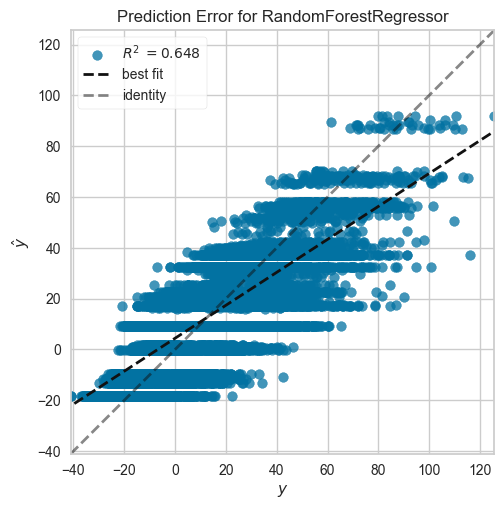

In [85]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test)

La predicción de error para este regresor de Random Forest muestra que el mejor ajuste está representado por la línea negra. La línea de identidad, que es nuestra gráfica de identidad del modelo, es la que se muestra aquí.

El mejor ajuste es lo que debemos alcanzar, y por eso obtenemos este resultado en R² con las características del modelo. La recta que mejor se ajusta a nuestro conjunto de datos es la que está en negro más oscuro, mientras que la que aparece en gris es la obtenida con nuestro modelo al pasar el parámetro MaxDepth igual a 5. Es una forma interesante de visualizar.

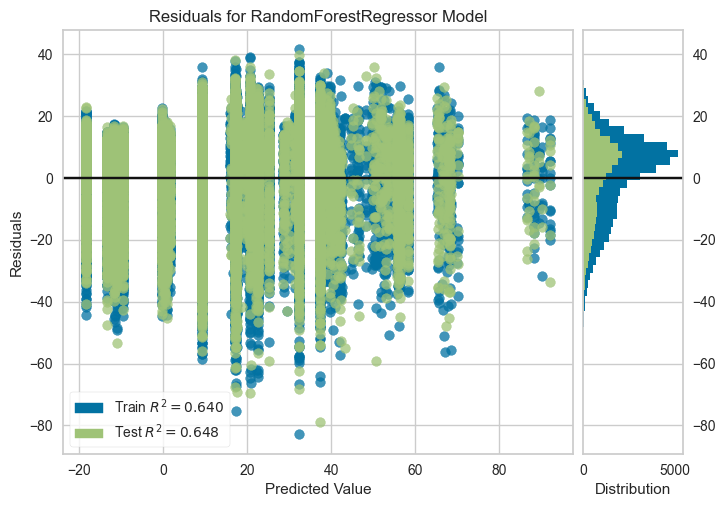

In [86]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

Hay un entrenamiento disponible en la plataforma de regresión, donde se explica más detalladamente en qué consisten los residuos. Básicamente, los residuos son la diferencia entre mis observaciones, los datos de entrenamiento, y la línea trazada por mi modelo.

Esta línea se traza de manera que minimice la distancia de cada observación hacia ella, y esos son los residuos. Queremos que los datos de prueba tengan un comportamiento lo más similar posible a los obtenidos con el entrenamiento.

Observamos que el comportamiento de prueba fue muy cercano al de entrenamiento. La idea de observar esta distribución es que, aunque el coeficiente de determinación del entrenamiento fue del 64%, al probarlo, llegó casi al 65%.

Esto indica que el modelo está generalizando relativamente bien sin mejoras adicionales, ajustes de hiperparámetros o refinamientos. Sin embargo, no es suficiente. Es necesario aplicar otras técnicas, como la validación cruzada, que nos permita tomar diversas muestras de nuestro conjunto de datos para verificar si el comportamiento se mantiene a lo largo de las distintas muestras o si el resultado fue producto de la aleatoriedad del modelo.

# **Realizando cross validation**

Hemos mencionado que realizamos un modelado utilizando bosques aleatorios, pero únicamente empleamos un mismo conjunto de datos para entrenamiento y otro para prueba.

Por lo tanto, no sabemos si nuestro modelo está generalizando adecuadamente con cualquier combinación de datos de entrenamiento y prueba. La idea de realizar una validación cruzada es precisamente dividir nuestro conjunto de datos en varias partes y tomar diferentes secciones de este conjunto para entrenar y probar.

Para ello, contamos con dos recursos de *Scikit-Learn* que son **KFold**.

In [87]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'RMSE': 'neg_root_mean_squared_error',
    'MAE': 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, cv=cv, scoring=scoring)
cv_results


{'fit_time': array([0.98466277, 0.97276378, 0.96278119, 0.98231268, 0.96835256]),
 'score_time': array([0.01948285, 0.01890707, 0.01892209, 0.02049375, 0.01826382]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

Observamos que para el `root_mean_squared_error`, el valor fue de -13.76, -13.86, -13.96, -13.85, -13.98, mostrando una variación leve pero consistente. En nuestro modelo, fue de 13.74, lo que indica consistencia y un buen resultado.

Para el error promedio absoluto, los valores fueron -11, -11.13, -11.20, -11.14, -11.25, y en nuestro modelo fue -11.02, lo cual es excelente. Por último, el coeficiente de determinación fue 64.5%, 63.74%, 63.5%, 64% y 63.4%, mientras que en nuestro modelo fue 64.77%. Esto indica que realizando esta validación cruzada, realmente hay consistencia en nuestros resultados.

# **Feature importances**

¿Será que todas estas columnas son importantes para nuestro modelo? Vamos a ver con cuántos atributos estamos trabajando. Antes de ajustar los hiperparámetros, tenemos 31 atributos, pero ¿serán esos 31 atributos relevantes?

Para saberlo, vamos a tomar nuestro modelo y consultar el atributo `feature_importances_`, que nos devuelve un NumPy array con el porcentaje de importancia de cada feature (característica).

In [88]:
len(df.columns)

31

In [89]:
importances = modelo.feature_importances_

In [90]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances':(importances*100).round(2)}).sort_values('Importances', ascending=False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [91]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = [i if i != 0 else 1 for i in range(0, 35, 5)]

for i in ct_features:
    selected_features = feature_importances['Features'].values[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model_features.fit(X_train_selected, y_train)
    y_pred_selected = model_features.predict(X_test_selected)
    metricas = calcular_regresion(y_test, y_pred_selected)
    resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


Observamos que con una Feature, tenemos un coeficiente de determinación del 33%; con 5 Features, del 57%; con 10 Features, alcanza el 64%; y con 15 Features, llega al 64.76%, estabilizándose. No hay diferencia significativa al usar más de 15 Features.

In [96]:
resultados = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])
model_features = RandomForestRegressor(max_depth=5, random_state=42)
ct_features = range(10, 16)

for i in ct_features:
    selected_features = feature_importances['Features'].values[:i]
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]
    model_features.fit(X_train_selected, y_train)
    y_pred = model_features.predict(X_test_selected)
    metricas = calcular_regresion(y_test, y_pred)
    resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


 Observamos que de 10 a 12 Features, hay una mejora gradual hasta llegar a 13 Features, donde se estabiliza. A partir de 13 Features, 14, 15, no hay mejora adicional.

Para el Root Mean Square Error, y también para el Mean Absolute Error, disminuyó de 11.03 a 11.02 minutos, mostrando una mejora. El coeficiente de determinación pasó de 64.74 a 64.76. Por lo tanto, tiene sentido dejarlo en 13 Features.

In [98]:
selected_features = feature_importances['Features'].values[:13]
X_selected_features = X[selected_features]
X_selected_features


,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


Aquí están las 13 que seleccionamos. Comienza con Airline, VZ y va hasta el tipo de aeronave, que sería el Boeing 737, y así sucesivamente. Estas son las Features más importantes.

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

# **Optimizando hiperparámetros con GridSearchCV**

Hemos elegido las trece *features* (características) o atributos más importantes de nuestro modelo y ahora procederemos a ajustar los hiperparámetros. Si consultamos la documentación, veremos el estimador de *Random Forest* y el regresor. Observemos la cantidad de hiperparámetros que podemos ajustar: los estimadores, el criterio, la profundidad máxima, el mínimo de muestras para cada división, las mínimas muestras de hojas, la cantidad máxima de features, la cantidad máxima de nodos de hojas, entre otros.

Es una serie de hiperparámetros bastante numerosa. Sin embargo, no ajustaremos cada uno individualmente, ya que para ello existe un recurso muy importante que nos ofrece **Scikit Learn**, que es `GridSearchCV` con validación cruzada (*cross-validation*).

Este recurso nos permite realizar una búsqueda exhaustiva de los parámetros especificados para un estimador. Vamos a utilizar un diccionario con los parámetros que entrenaremos o usaremos para determinar cuál es el mejor estimador.

In [100]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

> *Para calcular cuántas veces se entrena y evalúa el algoritmo, multiplicamos el número de combinaciones únicas de hiperparámetros por el número de pliegues en la validación cruzada. Hay 3 opciones para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' y 3 para 'n_estimators'. Por lo tanto, el número total de combinaciones únicas de hiperparámetros es 3 * 3 * 3 * 3 = 81. Como estamos usando validación cruzada de 3 pliegues, cada conjunto de hiperparámetros será entrenado y evaluado 3 veces. Por lo tanto, el algoritmo será entrenado y evaluado 81 * 3 = 243 veces en total.*

In [102]:
from sklearn.model_selection import GridSearchCV

cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid, cv=cv, scoring='r2')

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

Ahora tenemos nuestro mejor estimador. Para identificarlo, tomaremos directamente de model_grid los mejores parámetros. Estos son: una profundidad de 10, con un mínimo muestreo de hojas de 3, un mínimo muestreo de divisiones de 2, y un número de estimadores de 200.

In [103]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [104]:
y_pred_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_regresion(y_test, y_pred_grid)
metricas_model_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [105]:
resultados['modelo_grid'] = list(metricas_model_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


Al visualizar los resultados, observamos que el modelo Grid mejoró el Root Mean Square Error (RMSE) de 13.74 minutos a 13.2 minutos, y el error absoluto medio (MAE) de 11.02 minutos a 10.62 minutos, mostrando una mejora continua y notable. El coeficiente de determinación (R2) pasó del 64% al 67%, indicando que nuestro modelo realmente mejoró con estos parámetros y características.

# **Serializando el modelo**

Ya tenemos un modelo de *Machine Learning* listo para serializar, es decir, para disponibilizarlo y que pueda ser consumido eventualmente por otros equipos.

Para realizar esta tarea, vamos a importar un módulo que nos permite llevar a cabo esta función, llamado `pickle`. 

In [ ]:
import pickle
try:
    with open('../mod/champion.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('Modelo serializado con éxito')
except Exception as e:
    print('Se presento un error al almacenar el modelo: ', str(e))

Modelo serializado con éxito


## **Manos a la obra: utilizando el modelo guardado**

Concluimos el proceso de desarrollo, optimización y guardado del modelo. Sin embargo, surge la cuestión de cómo utilizar efectivamente este modelo en situaciones prácticas. ¿Cómo podemos aprovechar el modelo que fue guardado para realizar predicciones actualizadas?

Ante esto, construye un código que cargue el modelo guardado y realice la predicción para la siguiente muestra:

In [107]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Para realizar la carga y poder predecir una nueva muestra, vamos a adoptar los pasos a continuación:

1 - Asegúrate de tener el archivo del modelo guardado en un lugar accesible. Por ejemplo, la ruta del archivo puede ser `./ml/champion.pkl`.

2 - Importa la biblioteca pickle en tu código

3 - Carga el modelo guardado utilizando la función `pickle.load()`


In [ ]:
import pickle

file_path = '../mod/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))


¡Modelo cargado con éxito!


El parámetro 'rb' en el método `open()` de Python significa "read binary" (leer binario). Después de esto, el modelo está cargado y guardado en la variable model.

4 - Ahora puedes usar el modelo cargado para hacer predicciones con los nuevos datos. Asegúrate de que los datos de entrada estén en el formato esperado por el modelo.

In [109]:
# Ejemplo de predicción con datos de entrada 'X'
model.predict([nueva_muestra])[0]

np.float64(48.73321005358915)

# **Conclusión**

 A lo largo de este entrenamiento, trabajamos con un conjunto de datos que contiene información sobre vuelos que llegan a un aeropuerto, incluyendo datos de diversas aerolíneas y tipos de aeronaves.

Realizamos una inspección de este conjunto de datos, así como una revisión y un análisis exploratorio. También llevamos a cabo un análisis visual y un análisis de distribución para examinar la estadística descriptiva de estos datos.

Además, realizamos *feature engineering* (ingeniería de características), generando nuevas columnas y eliminando aquellas que no aportaban información relevante.

De igual manera, codificamos las columnas categóricas para poder generar una línea base o referencia, a partir de la cual desarrollamos un modelo de *Machine Learning* (aprendizaje automático) que nos permitió estimar el tiempo de atraso de los vuelos.